In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read 10x dataset
adata_og = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata_og.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [2]:
adata_filt = sc.pp.recipe_zheng17(adata_og, copy=True)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


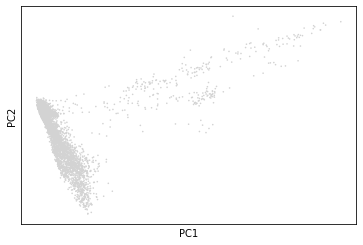

In [3]:
sc.tl.pca(adata_filt)
sc.pl.pca(adata_filt)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


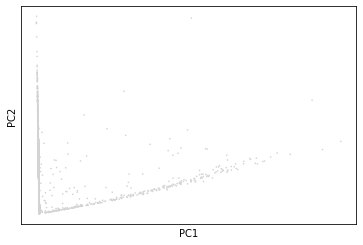

In [4]:
sc.tl.pca(adata_og)
sc.pl.pca(adata_og)

In [5]:
sc.pp.neighbors(adata_filt)
sc.tl.leiden(adata_filt)
print(adata_filt)

AnnData object with n_obs × n_vars = 11843 × 999
    obs: 'n_counts_all', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'leiden'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


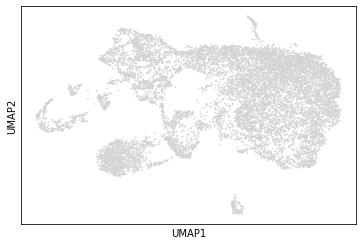

In [6]:
sc.tl.umap(adata_filt)
sc.pl.umap(adata_filt)

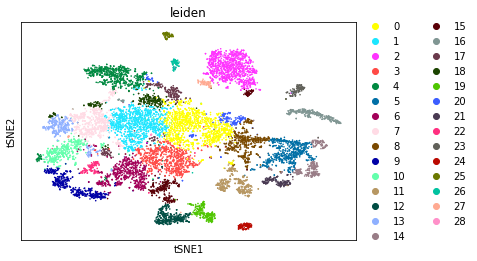

In [7]:
sc.tl.tsne(adata_filt)
sc.pl.tsne(adata_filt, color='leiden')

In [17]:
sc.tl.rank_genes_groups(adata_filt, groupby='leiden', method='logreg')

/opt/anaconda3/envs/scanpy/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


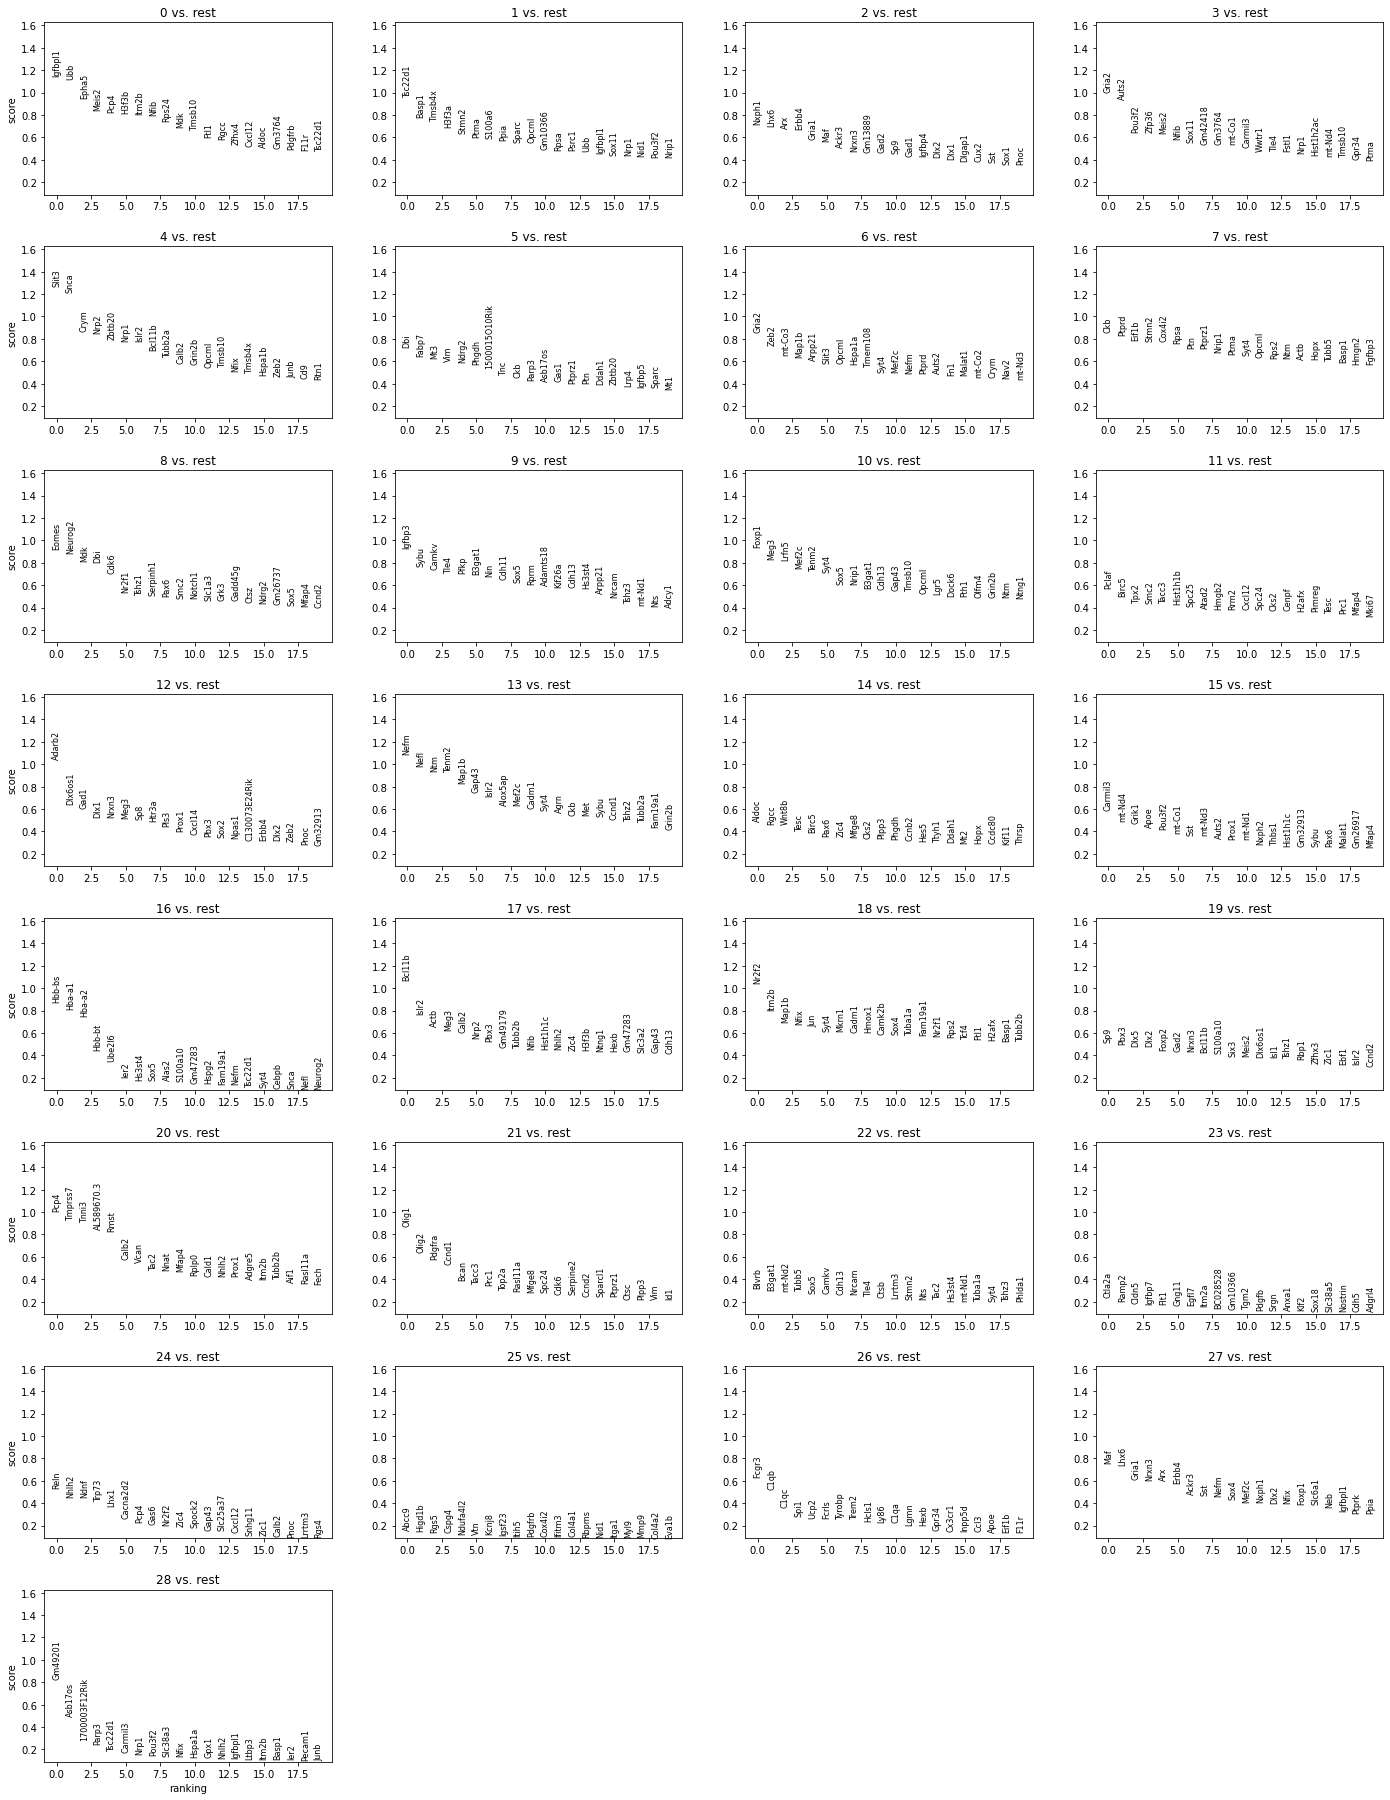

In [16]:
sc.pl.rank_genes_groups(adata_filt)

In [18]:
sc.tl.rank_genes_groups(adata_filt, groupby='leiden', method='t-test')

/opt/anaconda3/envs/scanpy/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


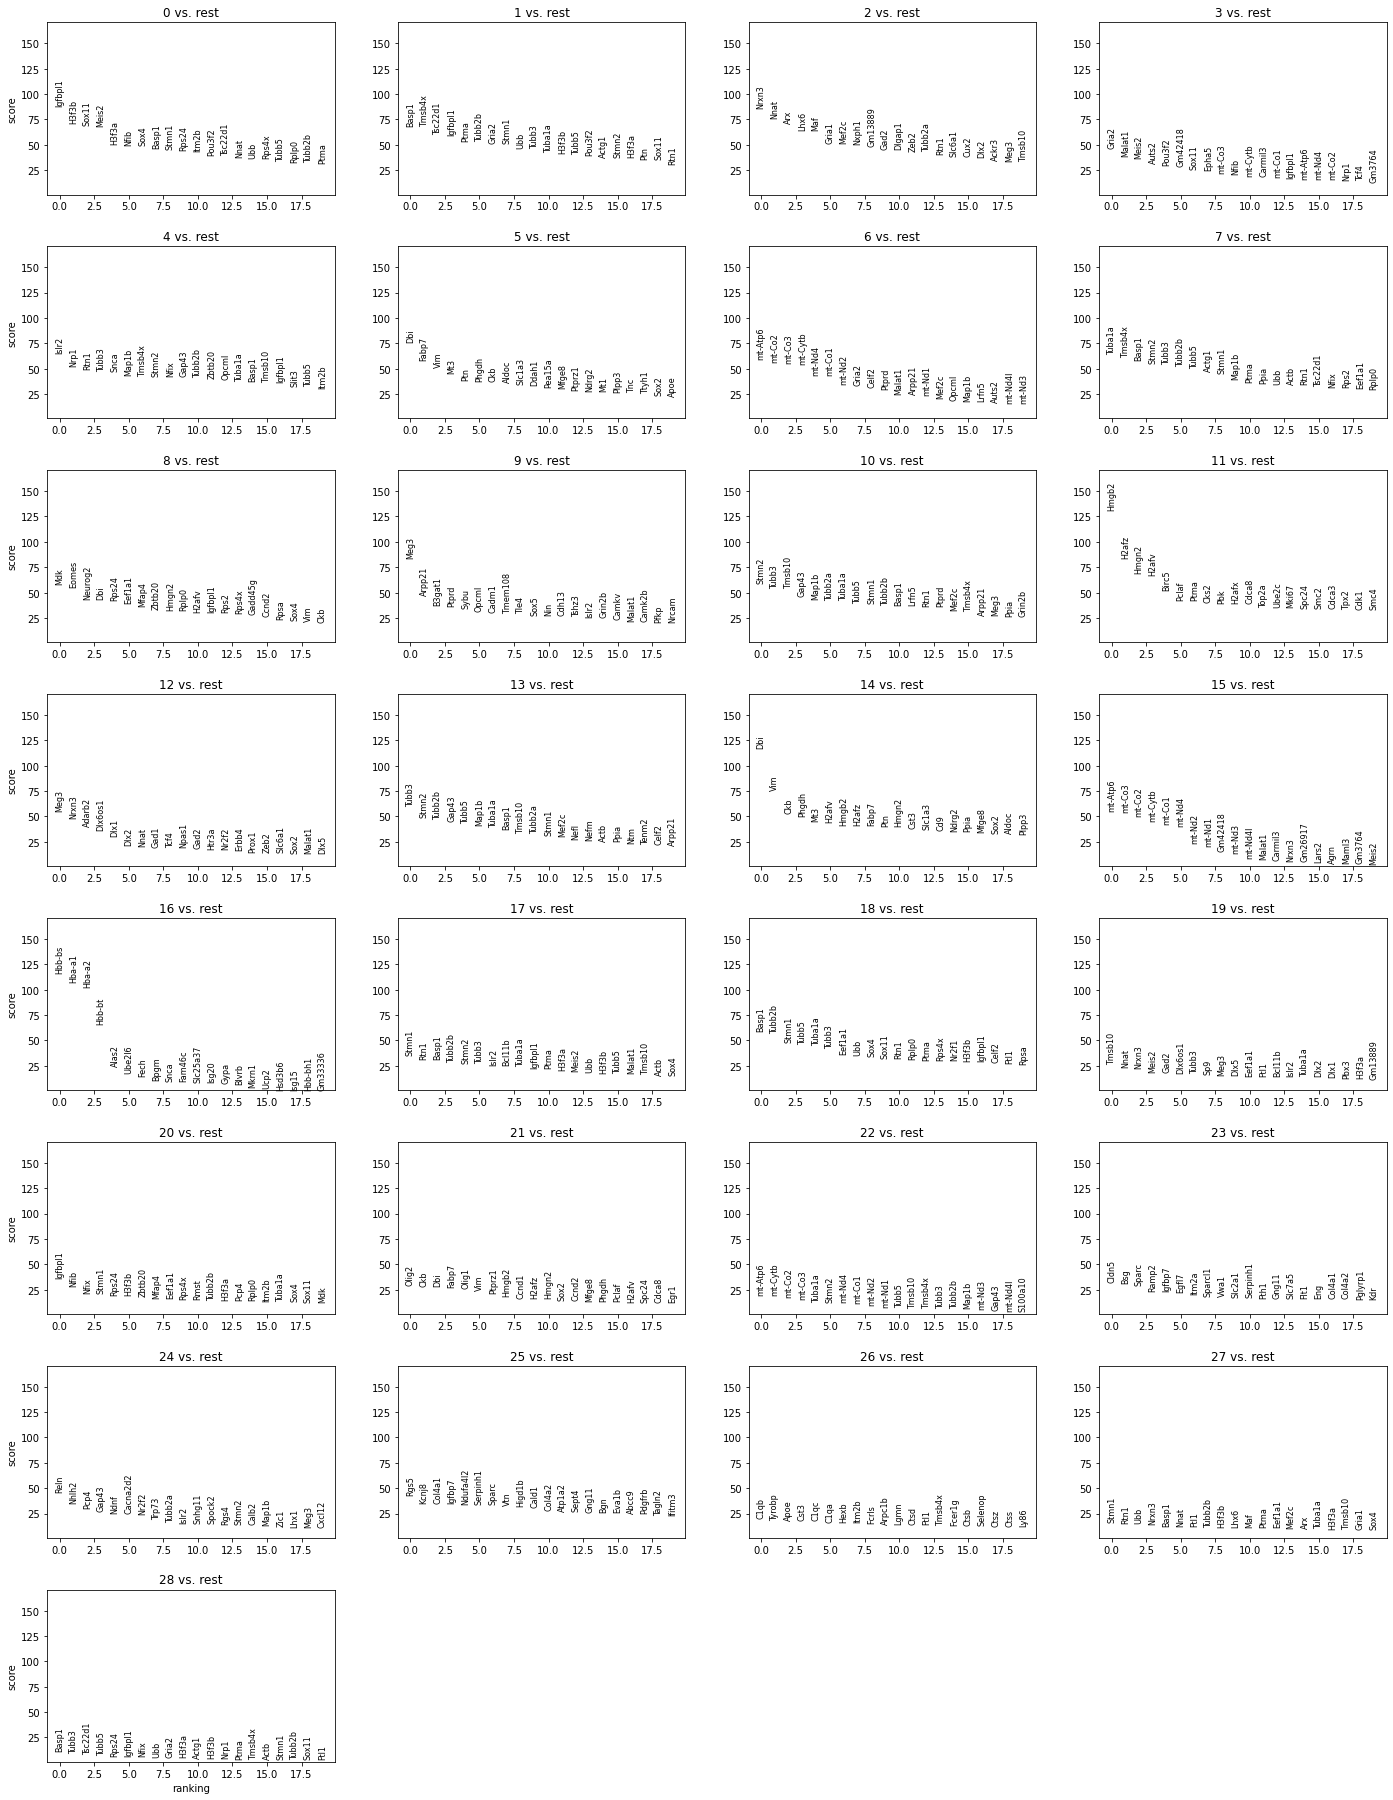

In [19]:
sc.pl.rank_genes_groups(adata_filt)